In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import mwclient

In [3]:
site = mwclient.Site('en.wikipedia.org')

In [88]:
math_entries=[]
for category in open('./math_categories.txt'):
    category=category.strip()
    math_entries+=[d['title'] for d in list(site.Categories[category].members(generator=False))]

In [92]:
len(math_entries)

4230

In [93]:
years=[]
for line in open('./math_concept_timeline.txt'):
    line=line.strip()
    t=line[:line.find(' – ')]
    t=t.split(' ')
    if len(t)>1 and t[1]!='BC':
        continue
    if len(t)>1:
        sign=-1
    else:
        sign=1
    try:
        year=int(t[0].replace(',',''))
    except:
        continue
    year=year*sign
    years.append((year,line.lower()))

In [101]:
math_concept_year=[]
for entry in math_entries:
    for year,description in years:
        if entry.lower().replace('_',' ') in description:
            math_concept_year.append([entry,year])
            break

In [96]:
len(math_concept_year)

66

In [98]:
math_concept_year

[('Information theory', 1949),
 ('DISCUS', -350),
 ('Dedekind cut', 1872),
 ('Representation theory', 1929),
 ('Set theory', 1895),
 ('Almost', 1030),
 ('Category theory', 1945),
 ('Complex plane', 1815),
 ('Graph theory', 1736),
 ('Graph isomorphism', 2015),
 ('Seven Bridges of Königsberg', 1736),
 ('Number theory', 1801),
 ('Amicable numbers', 895),
 ('Basel problem', 1735),
 ('Bernoulli number', 1708),
 ('Disquisitiones Arithmeticae', 1801),
 ('N conjecture', 1916),
 ('Binomial coefficient', 1303),
 ('Combination', -300),
 ('Group theory', 1832),
 ('Classification of finite simple groups', 1983),
 ('Number', -20000),
 ('Spectral sequence', 1946),
 ('Analysis', 850),
 ('Differential equation', 1691),
 ('Linear differential equation', 1873),
 ('Wave', 1849),
 ('Dynamical system', 1950),
 ('Numerical analysis', 953),
 ('Approximation', 1987),
 ("Horner's method", -150),
 ('Hypot', 1859),
 ('Richardson extrapolation', 1722),
 ('Topology', 1895),
 ('Bernoulli number', 1708),
 ('Curve', 1

In [102]:
math_concept_year_df=pandas.DataFrame(math_concept_year,columns=['Entry Name','Year'])

In [99]:
import pandas

In [100]:
visit_count_df=pandas.read_csv('./data/entry_visit_count.csv')

In [104]:
merged_df=pandas.merge(math_concept_year_df, visit_count_df, left_on="Entry Name",right_on="Entry")

In [110]:
filtered_df=merged_df[merged_df['Year']>-2000]

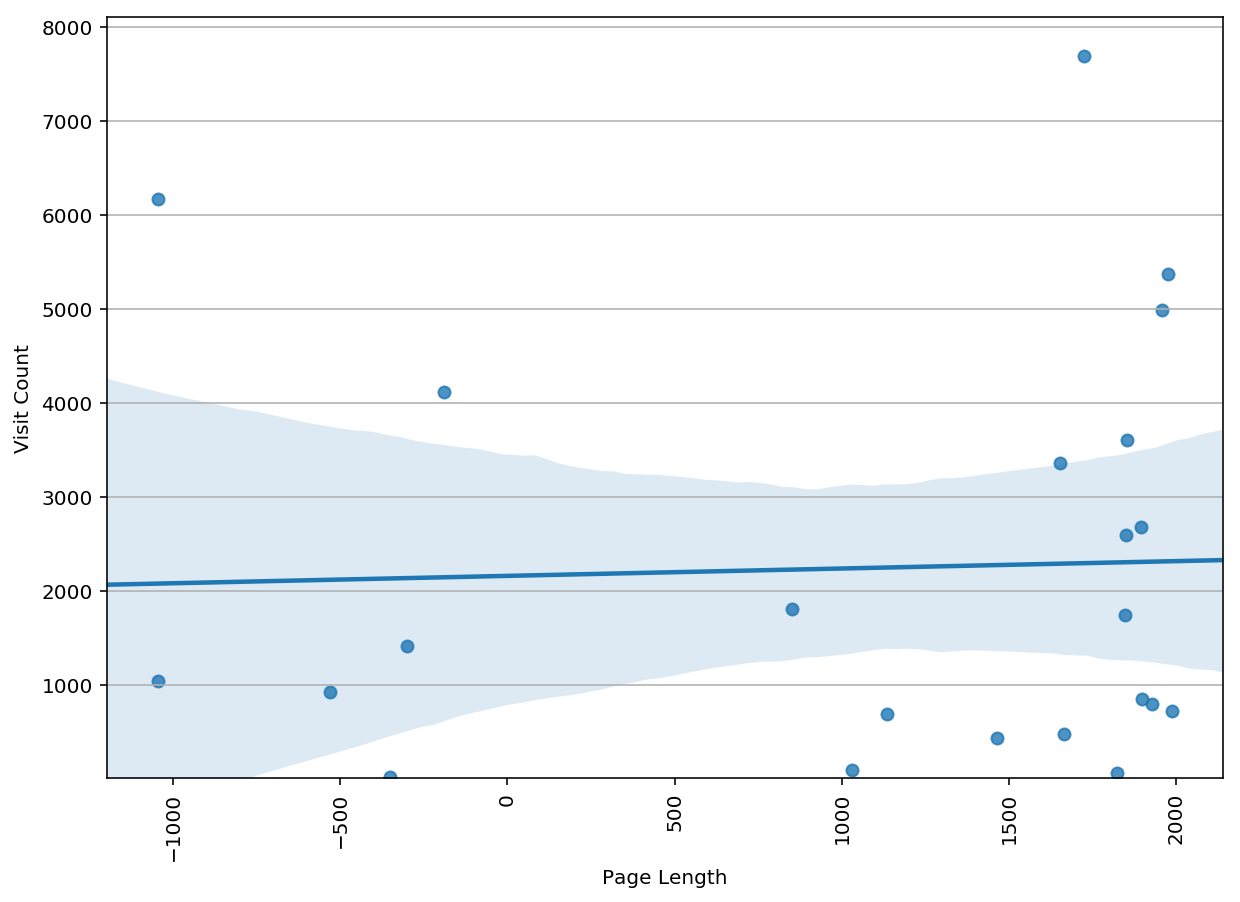

In [111]:
plt.figure(figsize=(10,7))
sns.regplot(x="Year", y="Visit Count", data=filtered_df)
plt.xticks(rotation='vertical')
plt.xlabel('Page Length')
plt.grid(axis='y')
plt.ylim((10,None))
plt.show()